In [2]:
import pandas as pd
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("data 3.csv")

In [4]:
df = dataset
df = df.drop(['CGPA'],axis=1)
df

,Did you do webdev during college time ?,Are you good at Data analysis ?,Are you a tech person ?,Were you in a non tech society ?,Are you good at coding ?,Have you developed mobile apps ?,Are you good at communication ?,Do you have specialization in security,Have you ever handled large databases ?,Do you have knowlege of statistics and data science?,Are you proficient in English ?,Have you ever managed some event?,Do you write technical blogs ?,Are you into marketing ?,Are you a ML expert ?,Do you have a lot of connections ?,Have you ever built live project ?,Role
0,yes,no,no,no,yes,yes,no,no,no,no,yes,no,no,no,no,no,no,Developer
1,yes,no,yes,no,yes,no,no,no,no,yes,yes,no,no,no,yes,no,no,ML engineer
2,no,no,no,yes,no,no,yes,no,no,no,yes,yes,no,no,no,no,no,Management
3,yes,no,yes,no,yes,yes,no,no,yes,no,no,no,no,no,no,no,yes,Developer
4,no,no,no,yes,yes,no,yes,no,no,no,yes,no,no,no,no,yes,no,Marketing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,yes,no,no,no,no,no,no,no,yes,no,yes,no,no,no,no,yes,no,Data Engineer
205,yes,no,yes,no,yes,yes,yes,no,yes,no,yes,no,yes,no,no,yes,yes,Developer
206,no,no,no,no,yes,no,yes,yes,no,no,no,yes,yes,no,no,no,yes,Security
207,no,no,no,yes,no,no,yes,no,no,no,yes,yes,no,yes,no,yes,no,Marketing


In [5]:
data = df.iloc[:,:-1].values
label = df.iloc[:,-1].values
data.shape

(209, 17)

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [7]:
labelencoder = LabelEncoder()

In [8]:
for i in range(0,17):
    data[:,i] = labelencoder.fit_transform(data[:,i])
data

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1]], dtype=object)

In [9]:
from sklearn.preprocessing import Normalizer

In [10]:
data1=data[:,:]

In [11]:
list(df.columns)

['Did you do webdev during college time ?',
 'Are you good at Data analysis ?',
 'Are you a tech person ?',
 'Were you in a non tech society ?',
 'Are you good at coding ?',
 'Have you developed mobile apps ?',
 'Are you good at communication ?',
 'Do you have specialization in security',
 'Have you ever handled large databases ?',
 'Do you have knowlege of statistics and data science?',
 'Are you proficient in English ?',
 'Have you ever managed some event?',
 'Do you write technical blogs ?',
 'Are you into marketing ?',
 'Are you a ML expert ?',
 'Do you have a lot of connections ?',
 'Have you ever built live project ?',
 'Role']

## adding headers

In [12]:
X1 = pd.DataFrame(data1,columns=['Did you do webdev during college time ?',
 'Are you good at Data analysis ?',
 'Are you a tech person ?',
 'Were you in a non tech society ?',
 'Are you good at coding ?',
 'Have you developed mobile apps ?',
 'Are you good at communication ?',
 'Do you have specialization in security ',
 'Have you ever handled large databases ?',
 'Do you have knowlege of statistics and data science?',
 'Are you proficient in English ?',
 'Have you ever managed some event?',
 'Do you write technical blogs ?',
 'Are you into marketing ?',
 'Are you a ML expert ?',
 'Do you have a lot of connections ?',
 'Have you ever built live project ?'])

In [13]:
print(X1.shape)
X1.head(80)

(209, 17)


,Did you do webdev during college time ?,Are you good at Data analysis ?,Are you a tech person ?,Were you in a non tech society ?,Are you good at coding ?,Have you developed mobile apps ?,Are you good at communication ?,Do you have specialization in security,Have you ever handled large databases ?,Do you have knowlege of statistics and data science?,Are you proficient in English ?,Have you ever managed some event?,Do you write technical blogs ?,Are you into marketing ?,Are you a ML expert ?,Do you have a lot of connections ?,Have you ever built live project ?
0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
1,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0
2,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0
3,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,0,1,0,1,1,1,0,1,0,1,0,1,0,0,0,0
76,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1
77,0,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,1
78,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1


In [14]:
label = labelencoder.fit_transform(label)
label

array([4, 5, 6, 4, 7, 4, 4, 3, 0, 1, 1, 4, 5, 4, 4, 8, 3, 4, 7, 4, 4, 2,
       4, 6, 4, 0, 5, 4, 7, 6, 2, 0, 4, 5, 7, 1, 4, 5, 7, 1, 4, 4, 2, 6,
       0, 8, 4, 6, 7, 8, 3, 2, 4, 7, 6, 2, 0, 4, 8, 5, 1, 5, 6, 1, 0, 3,
       8, 1, 3, 4, 4, 4, 2, 6, 3, 4, 5, 0, 3, 4, 8, 7, 1, 6, 7, 4, 8, 3,
       1, 0, 6, 5, 8, 5, 1, 5, 6, 1, 0, 7, 1, 4, 2, 6, 0, 4, 3, 6, 0, 4,
       7, 6, 0, 1, 1, 4, 4, 2, 6, 3, 4, 5, 0, 5, 7, 1, 4, 2, 6, 4, 7, 4,
       4, 4, 3, 0, 1, 1, 4, 5, 4, 8, 8, 7, 1, 6, 7, 8, 3, 1, 6, 7, 8, 3,
       1, 0, 6, 5, 7, 1, 4, 2, 4, 5, 4, 8, 8, 7, 1, 6, 6, 0, 4, 7, 6, 2,
       0, 4, 8, 5, 1, 5, 3, 2, 3, 4, 8, 7, 1, 4, 7, 6, 2, 0, 4, 8, 5, 1,
       5, 6, 1, 4, 5, 0, 3, 4, 8, 7, 1])

In [15]:
y=pd.DataFrame(label,columns=["Suggested Job Role"])
y.head()

,Suggested Job Role
0,4
1,5
2,6
3,4
4,7


# Decision Tree Classifier 

In [16]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.20,random_state=101) 
df

,Did you do webdev during college time ?,Are you good at Data analysis ?,Are you a tech person ?,Were you in a non tech society ?,Are you good at coding ?,Have you developed mobile apps ?,Are you good at communication ?,Do you have specialization in security,Have you ever handled large databases ?,Do you have knowlege of statistics and data science?,Are you proficient in English ?,Have you ever managed some event?,Do you write technical blogs ?,Are you into marketing ?,Are you a ML expert ?,Do you have a lot of connections ?,Have you ever built live project ?,Role
0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,Developer
1,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,ML engineer
2,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,Management
3,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,Developer
4,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,Marketing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,Data Engineer
205,1,0,1,0,1,1,1,0,1,0,1,0,1,0,0,1,1,Developer
206,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,1,Security
207,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,Marketing


|--- feature_5 <= 0.50
|   |--- feature_13 <= 0.50
|   |   |--- feature_11 <= 0.50
|   |   |   |--- feature_12 <= 0.50
|   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |--- feature_14 <= 0.50
|   |   |   |   |   |   |   |--- feature_10 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |--- feature_10 >  0.50
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_14 >  0.50
|   |   |   | 

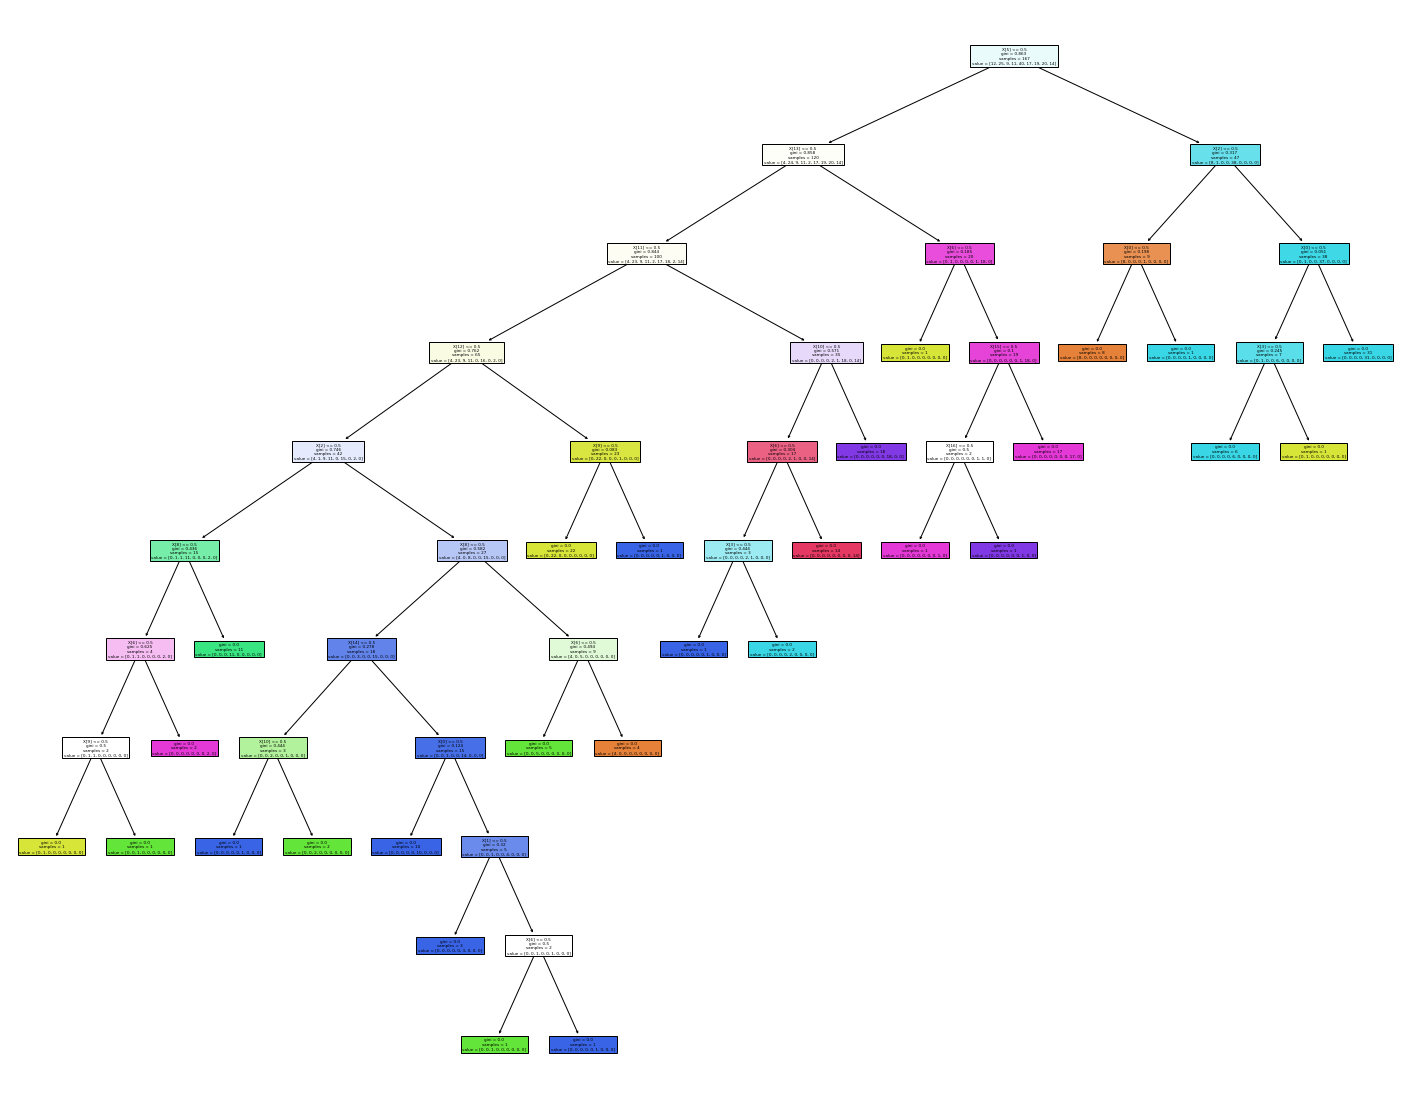

In [18]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
text_representation = tree.export_text(clf)
print(text_representation)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, filled=True)

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [20]:
y_pred = clf.predict(X_test)

In [21]:
print(y_pred)
print(y_test)

[8 0 2 1 3 4 0 0 5 7 3 3 3 0 4 8 4 0 0 5 5 4 6 6 6 7 3 2 6 8 4 2 4 6 5 8 6
 4 4 1 4 4]
     Suggested Job Role
178                   8
112                   0
183                   2
149                   1
184                   3
172                   4
135                   0
89                    0
37                    5
34                    7
148                   3
65                    3
78                    3
155                   0
185                   4
66                    8
85                    4
176                   0
31                    0
91                    5
42                    2
41                    4
156                   6
54                    6
170                   6
48                    7
50                    3
161                   2
139                   5
147                   8
25                    0
55                    2
205                   4
2                     6
12                    5
152                   8
150                   6
2

In [22]:
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)

In [23]:
print("confusion matrics=",cm)
print("  ")
print("accuracy=",accuracy*100)

confusion matrics= [[6 0 0 0 1 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 3 0 0 1 0 0 0]
 [0 0 0 5 0 0 0 0 0]
 [0 0 0 0 9 0 0 0 0]
 [0 0 0 0 0 3 1 0 0]
 [0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 4]]
  
accuracy= 92.85714285714286


# Decision tree with entropy

In [41]:
clf_entropy = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 18)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=18)

In [42]:
entropy_y_pred=clf_entropy.predict(X_test)

In [43]:
cm_entopy = confusion_matrix(y_test,entropy_y_pred)

In [44]:
entropy_accuracy = accuracy_score(y_test,entropy_y_pred)

In [45]:
print("confusion matrics=",cm_entopy)
print("  ")
print("accuracy=",entropy_accuracy*100)

confusion matrics= [[7 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0]
 [0 0 0 0 9 0 0 0 0]
 [0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 4]]
  
accuracy= 100.0


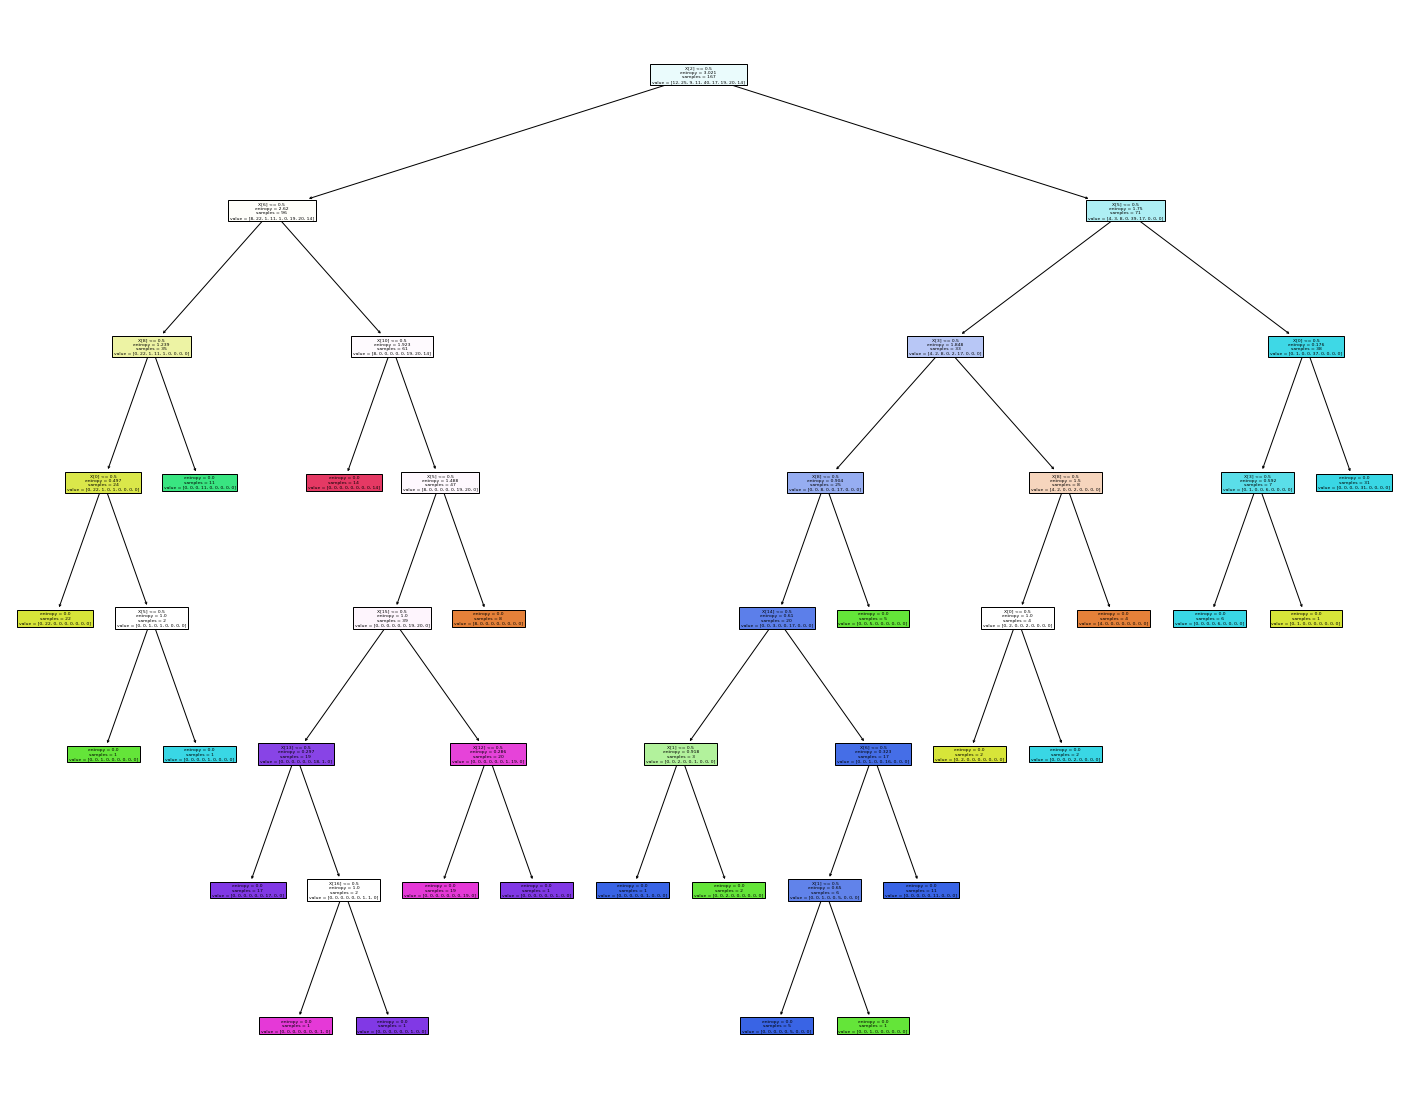

In [46]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_entropy, filled=True)

# SVM (Support vector machine) classifier

In [30]:
from sklearn import svm

In [31]:
clf = svm.SVC()
clf.fit(X_train, y_train)

c:\users\mansi\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [32]:
svm_y_pred = clf.predict(X_test)

In [33]:
svm_cm = confusion_matrix(y_test,svm_y_pred)
svm_accuracy = accuracy_score(y_test,svm_y_pred)

In [34]:
print("confusion matrics=",svm_cm)
print("  ")
print("accuracy=",svm_accuracy*100)

confusion matrics= [[6 0 0 0 1 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0]
 [0 0 0 0 9 0 0 0 0]
 [0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 4]]
  
accuracy= 97.61904761904762


#  xgboost

# changing data type to int64

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.3,random_state=10) 

In [54]:
X_train.shape

(62, 16)

In [55]:
X_train=pd.to_numeric(X_train.values.flatten())

In [56]:
X_train=X_train.reshape((25,16))

ValueError: cannot reshape array of size 992 into shape (25,16)

In [57]:
y_train.shape

(62, 1)

In [58]:
from xgboost import XGBClassifier

In [59]:
model = XGBClassifier()
model.fit(X_train, y_train)

c:\users\mansi\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


ValueError: Please reshape the input data X into 2-dimensional matrix.

In [ ]:
xgb_y_pred = clf.predict(X_test)

In [60]:
xgb_cm = confusion_matrix(y_test,xgb_y_pred)
xgb_accuracy = accuracy_score(y_test,xgb_y_pred)


NameError: name 'xgb_y_pred' is not defined

In [61]:
print("confusion matrics=",xgb_cm)
print("  ")
print("accuracy=",xgb_accuracy*100)

NameError: name 'xgb_cm' is not defined